In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [32]:
# choose language
lang = 'ZH' # 'ZH' or 'EN'

# import EmpatheticPersonas dataset
df = pd.read_csv('data/empatheticPersonas' + lang + '.csv', index_col=0)
df.head()

,年龄,悲伤 - 患者反应 1,悲伤 - 患者反应 2,悲伤 - 患者反应 3,悲伤 - 这是由特别事件引起的吗？,悲伤 - 这是由最近或遥远的事件（或多个事件）引起的吗？,悲伤 - 您最近是否尝试过协议6，并发现由于旧事件而重新点燃了无法控制的情绪？,悲伤 - 您最近是否尝试过协议11，并发现由于旧事件而重新点燃了无法控制的情绪？,悲伤 - 谢谢。现在我会问一些问题以了解您的情况。,悲伤 - 您是否对某人有强烈的感受或表达以下任何情绪：,...,快乐 - 患者反应 3,快乐 - 那很好！让我推荐一个您可以尝试的协议。,所有情绪 - 根据您所说的，我相信您正在感受{}。这个对吗？,所有情绪 - 我很抱歉。请从下面的情绪中选择最能反映您感受的情绪：,所有情绪 - 感谢您的参与。再见,所有情绪 - 这是我的建议，请选择您想尝试的协议,所有情绪 - 请现在尝试通过此协议。完成后，按“继续”,所有情绪 - 采取此协议后，您感觉更好还是更糟？,所有情绪 - 您想尝试另一种协议吗？ （病人感觉好多了）,所有情绪 - 您想尝试另一种协议吗？ （病人感觉更糟）
性别,,,,,,,,,,,,,,,,,,,,,
男性,30-39,我有点沮丧,我心情很低落,此刻我感到相当难过,我很遗憾听到你感觉不舒服。有什么特别的事情让你有这种感觉吗？,我可以认同这一点。现在，这些感觉是最近还是很久以前发生的事件的结果？,首先，您的感受对我很重要，所以我需要询问您之前与协议的互动情况。你最近有没有尝试过协议 6，...,首先，您的感受对我很重要，所以我需要询问您之前与协议的互动情况。你最近有没有尝试过协议 11...,感谢您如此乐于助人和耐心。如果您不介意，我还有几个问题可以帮助我进一步了解情况。,我知道这可能很困难，但如果您能与我分享这一点，我会非常感激。请问您是否对某人表达或感受到了以...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
女性,50-59,我今天感觉不太好。我的狗不舒服。,我觉得有点难过。我担心失去工作。,我很沮丧。我和姐姐意见不合。,有没有发生什么特别让你感到难过的事情？不介意的话请告诉我。,NaN,有些人发现协议 6 不一定对他们有帮助，所以我试图评估它是否适合您当前的情况。您是否尝试过协...,有些人发现协议 11 不一定对他们有帮助，所以我试图评估它是否适合您当前的情况。您是否尝试过...,谢谢你与我分享。我要问你一些问题，这样我们才能找出困扰你的根源。,您是否对他人有或表达过以下任何强烈情绪：,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
男性,30-39,不太好，我的狗昨天死了。,不是很好，只是整个星期都感到沮丧。,不太好，我希望今天早点过去。,我很抱歉听到这个。是不是有什么特别的事情导致了这种感觉？,我明白了。你会说这是最近发生的还是遥远的事件？,谢谢，我明白了。你会说这种负面情绪是由最近对协议 6 的尝试引发的吗？,谢谢，我明白了。你会说这种负面情绪是由最近对协议 11 的尝试引发的吗？,感谢您的耐心等待。我现在将问您几个问题，以帮助您了解您的情况。,谢谢，感谢您的耐心等待。您是否会说您对某人有强烈的感受或表达过以下任何一种情绪：,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
女性,25-29,我有点沮丧,我真的很难过，因为我的狗跑了,男朋友跟我分手了，今天好难过,谢谢你。有没有发生什么让你难过的事情？,谢谢，我明白了。你能告诉我这是最近发生的事情还是前一阵子发生的事情吗？我希望你没有因为这次事...,如果你最近在研究协议 6 并且它从过去的事件中带回了一些不好的感觉，你能告诉我吗？,你能告诉我你最近是否在尝试协议 11 并且它从最近的事件中带回了一些不好的感觉吗？,谢谢你告诉我。我现在会问你一些问题，以便更多地了解你的情况。,你能告诉我你最近是否有以下任何情绪，或者你是否向其他人展示过这些情绪：,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
男性,25-29,我一直看中东的新闻报道让我更加焦虑。,随着学年即将结束，我有点坚定，我会想念我的学生。,我很难过，因为这是一个长周末，但我必须工作。,是不是发生了什么事情导致了这种感觉？,你能告诉我这个或多个事件是最近发生的还是过去发生的？,你是否尝试过协议 6，如果是的话，回顾这个​​创伤性事件是否会重新打开导致情绪爆发的旧伤口？,你是否尝试过协议 11，如果是的话，回顾最近的事件是否会重新打开导致情绪爆发的伤口？,谢谢，我很感激。我将尝试通过问你更多问题来深入了解这个问题。,你能想出一个你强烈感受到或向别人展示这些情绪的时候吗：,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# text  - extracts the 1181 expressions of emotions 
# label - emotion corresponding to text extract
if lang == 'ZH':
    emotions = ['悲伤', '愤怒', '快乐', '焦虑']
elif lang == 'EN':
    emotions = ['Sad', 'Angry', 'Happy', 'Anxious']

text = []
label = []
start_index = 0
label_encoding = 0
for emotion in emotions:
    for col in range(1,4):
        if lang == 'ZH':
            colname = emotion +' - 患者反应 ' + str(col)
        elif lang == 'EN':
            colname = emotion +' - Patient response ' + str(col)
        
        text += df[colname].dropna().values.tolist()
    end_index = len(text)
    # Label Encoding: 0 - 'Sad', 1- 'Angry', 2- 'Happy', 3 -'Anxious'
    label += [label_encoding]*(end_index - start_index)
    start_index = end_index
    label_encoding+=1

# print(text, label)

In [34]:
# sanity check - check text and label same length
print(len(text))
print(len(label))

1181
1181


In [35]:
# create the organised df
df = pd.DataFrame()
df['text']=text
df['labels']=label

In [36]:
df['labels'].value_counts()

0    300
2    300
1    297
3    284
Name: labels, dtype: int64

In [37]:
# manual train-test-val split (80-10-10 approx.)
# TRAIN SET
# take first 236 of each emotion as train
sad = df.loc[df['labels']==0]
angry = df.loc[df['labels']==1]
happy = df.loc[df['labels']==2]
anxious = df.loc[df['labels']==3]

df_train = pd.concat([sad.iloc[0:236], angry.iloc[0:236], happy.iloc[0:236], anxious.iloc[0:236]], ignore_index=True)
df_train = df_train.sample(frac=1).reset_index(drop=True) # shuffle the dataset

# TEST AND VALIDATION SET
# remainder split randomly 50-50
df_test = pd.concat([sad.iloc[236:], angry.iloc[236:], happy.iloc[236:], anxious.iloc[236:]], ignore_index=True)
df_val, df_test = train_test_split(df_test, test_size=0.5, shuffle=True, random_state=0)

In [38]:
# check distribution: approx equal
print(df_train['labels'].value_counts(normalize=True)*100)
print(df_test['labels'].value_counts(normalize=True)*100)
print(df_val['labels'].value_counts(normalize=True)*100)


1    25.0
3    25.0
0    25.0
2    25.0
Name: labels, dtype: float64
0    31.092437
2    28.571429
1    22.689076
3    17.647059
Name: labels, dtype: float64
1    28.813559
2    25.423729
3    22.881356
0    22.881356
Name: labels, dtype: float64


In [39]:
# export to csv
df.to_csv('data/' + lang + '/emotionlabeled_full.csv', index=False)
df_train.to_csv('data/' + lang + '/emotionlabeled_train.csv', index=False)
df_test.to_csv('data/' + lang + '/emotionlabeled_test.csv', index=False)
df_val.to_csv('data/' + lang + '/emotionlabeled_val.csv', index=False)

In [43]:
# translate-train-all dataset 
# ZH_train + EN_full
zh_train = pd.read_csv('data/ZH/emotionlabeled_train.csv', index_col=0)
en_full = pd.read_csv('data/EN/emotionlabeled_full.csv', index_col=0)

train_all = pd.concat([zh_train, en_full])
train_all = train_all.sample(frac=1) # shuffle the dataset

train_all.to_csv('data/EN-ZH/emotionlabeled_train.csv')

In [24]:
from scipy.interpolate import interp2d

# for infoXLM
X = np.array([1e-05, 3e-05, 5e-05, 7e-05, 9e-05, 1e-04])
Y = np.linspace(1,9,9)
Z_infoXLM = [[59, 83, 88, 83, 87, 10],
[87,90,90,9,10,10],
[88,88,91,92,10,9],
[92,10,91,90,10,10],
[91,92,10,92,9,82],
[91,91,91,10,91,10],
[91,92,91,94,10,10],
[88,92,92,90,10,91],
[90,91,92,92,10,10]]

Z_XLMR = [[80,92,91,86,90,82],
[89,91,91,86,90,89],
[91,90,91,90,91,10],
[91,92,91,92,89,11],
[94,92,93,91,88,86],
[91,92,89,91,89,10],
[90,94,90,91,29,89],
[93,90,93,93,90,9],
[91,92,92,92,92,26]]

Z_CBERT = [[80,86,88,87,86,86],
[85,88,92,89,84,93],
[86,87,90,90,86,85],
[86,89,91,87,88,86],
[89,88,86,89,87,90],
[91,87,91,85,91,89],
[88,91,90,84,86,86],
[89,87,85,89,87,87],
[92,90,90,91,92,86]]

x = np.linspace(1e-05,1e-04,100)
y = np.linspace(1,9,100)

z_infoXLM_func = interp2d(X,Y,Z_infoXLM,'cubic')
z_infoXLM = z_infoXLM_func(x,y)

z_XLMR_func = interp2d(X,Y,Z_XLMR,'cubic')
z_XLMR = z_XLMR_func(x,y)

z_CBERT_func = interp2d(X,Y,Z_CBERT,'cubic')
z_CBERT = z_CBERT_func(x,y)


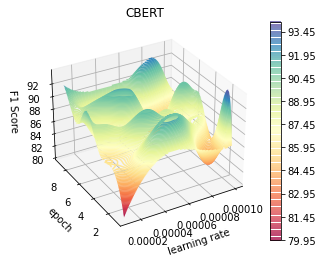

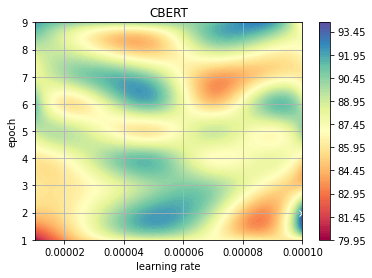

In [30]:
# CBERT Figures
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_CBERT, 100, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.view_init(elev=30.,azim=-120)
ax.set_title('CBERT')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_CBERT, 100, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('CBERT')
plt.plot(1e-04,2,'x',color='white')
plt.grid()
cbar = plt.colorbar(cs)

plt.show()

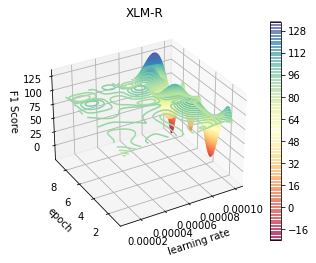

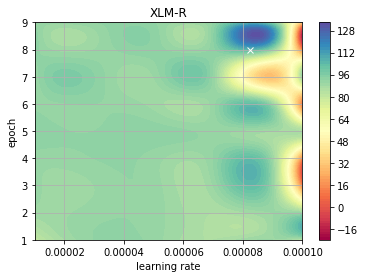

In [28]:
# XLM-R Figures
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_XLMR, 100, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.view_init(elev=30.,azim=-120)
ax.set_title('XLM-R')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_XLMR, 100, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('XLM-R')
plt.plot(8.25e-05,8,'x',color='white')
plt.grid()
cbar = plt.colorbar(cs)

plt.show()

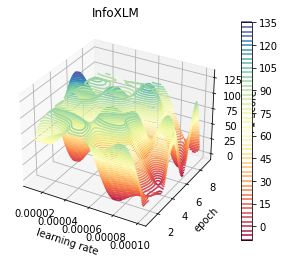

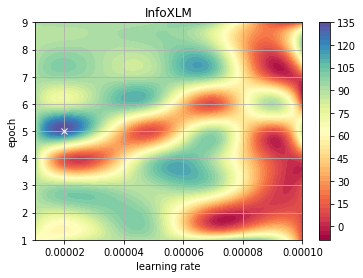

In [27]:
# InfoXLM 
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_infoXLM,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.set_title('InfoXLM')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_infoXLM,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('InfoXLM')
plt.plot(2e-05,5,'x',color='white')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()
